In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
from plotly.offline import iplot
import plotly.express as px 
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#drop Id column
df.drop('Id',inplace=True,axis=1)


In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 80)

In [7]:
#categorical features

In [8]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
#describe of categorical variable

In [11]:
df[categorical_features].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [12]:
#numerical feature

In [13]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
df[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
#describe of numerical variable
df[numerical_features].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:

missing_val=[feature for feature in df.columns if df[feature].isnull().sum()>1]
missing_val

for feature in missing_val:
    print(feature,':',np.round(df[feature].isnull().mean(),4) ,'% missing values')

LotFrontage : 0.1774 % missing values
Alley : 0.9377 % missing values
MasVnrType : 0.0055 % missing values
MasVnrArea : 0.0055 % missing values
BsmtQual : 0.0253 % missing values
BsmtCond : 0.0253 % missing values
BsmtExposure : 0.026 % missing values
BsmtFinType1 : 0.0253 % missing values
BsmtFinType2 : 0.026 % missing values
FireplaceQu : 0.4726 % missing values
GarageType : 0.0555 % missing values
GarageYrBlt : 0.0555 % missing values
GarageFinish : 0.0555 % missing values
GarageQual : 0.0555 % missing values
GarageCond : 0.0555 % missing values
PoolQC : 0.9952 % missing values
Fence : 0.8075 % missing values
MiscFeature : 0.963 % missing values


In [17]:
#how missing value effect the target variable-->houce price

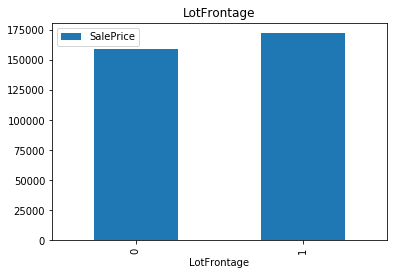

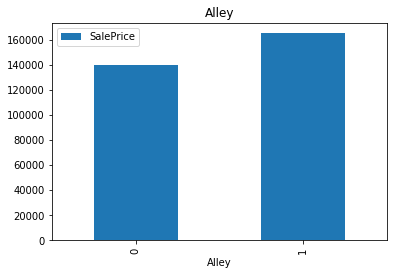

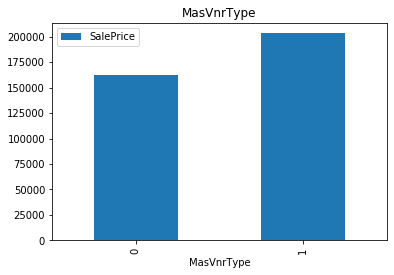

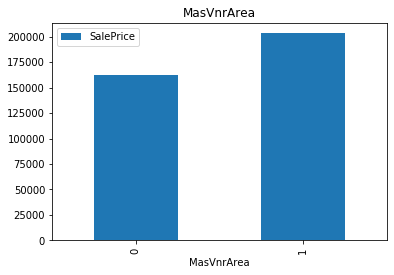

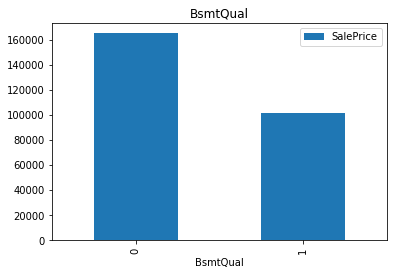

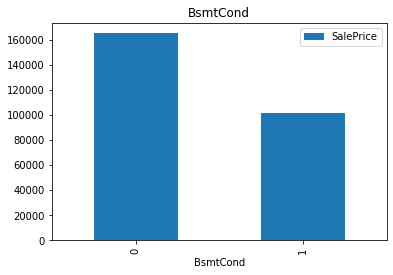

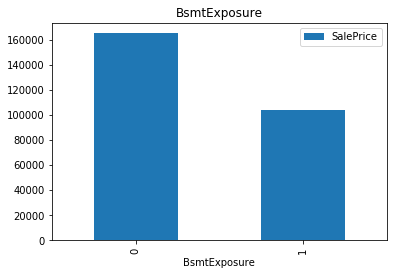

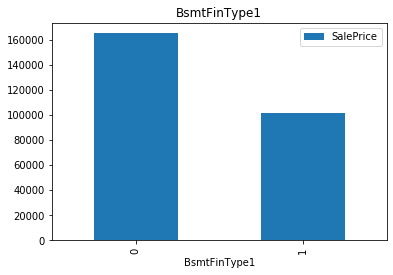

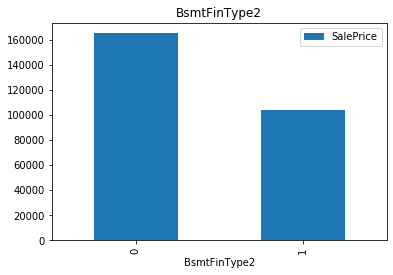

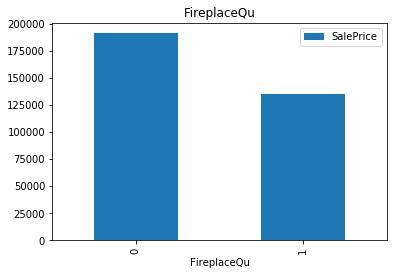

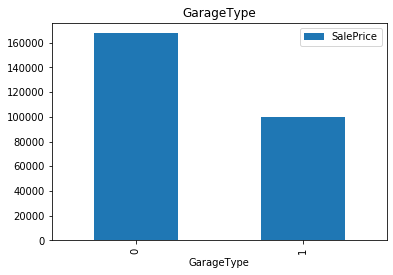

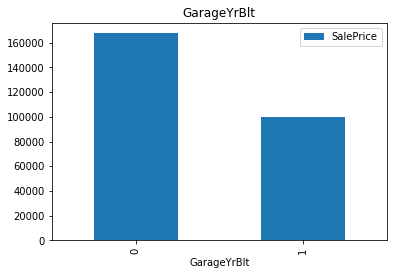

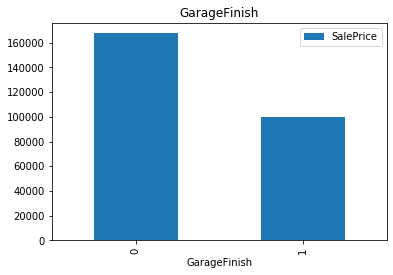

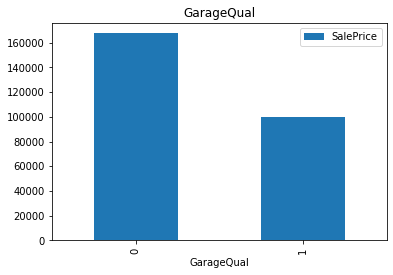

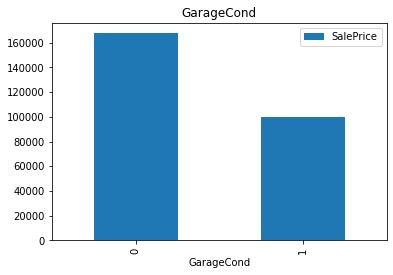

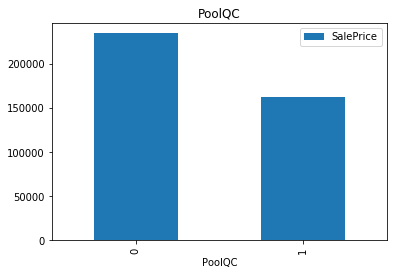

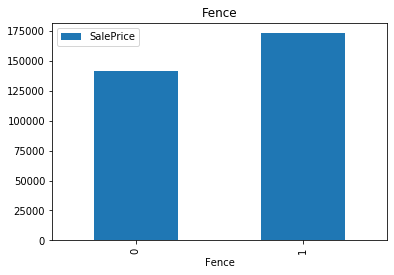

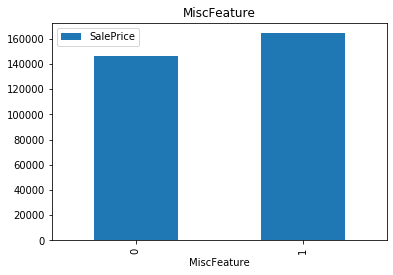

In [18]:
for feature in missing_val:
    data=df.copy()
    
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)[['SalePrice']].median().plot.bar()
    plt.title(feature)
    plt.show()
    
    

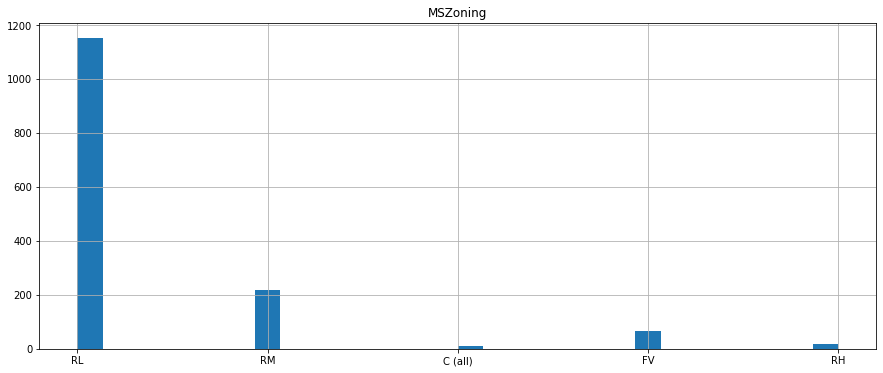

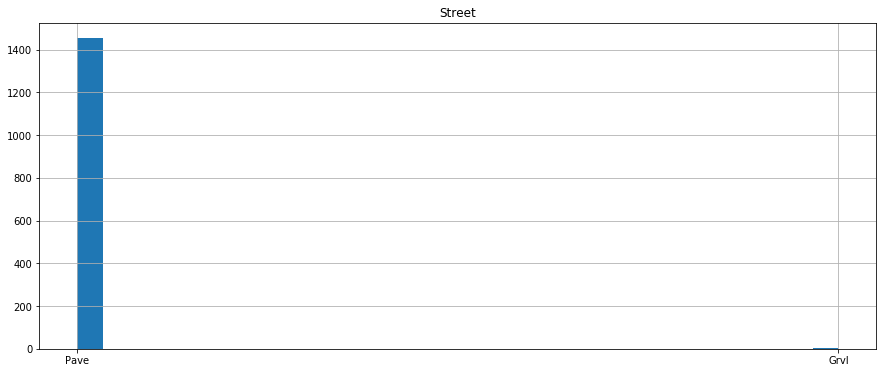

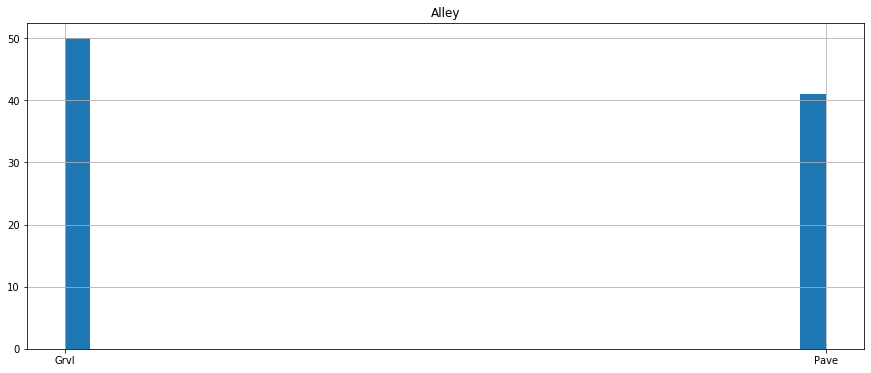

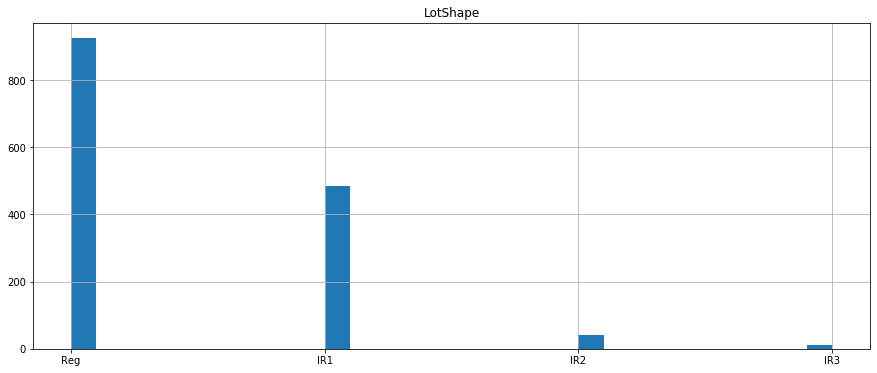

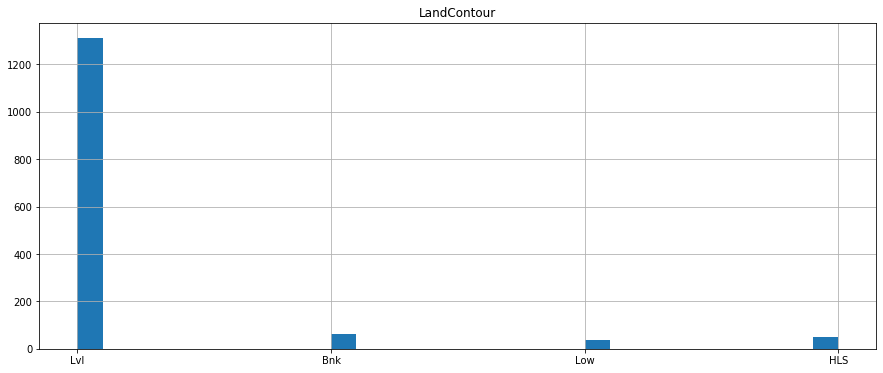

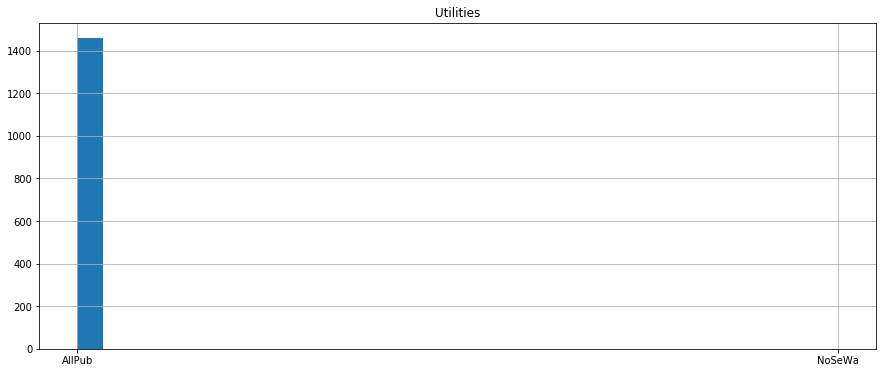

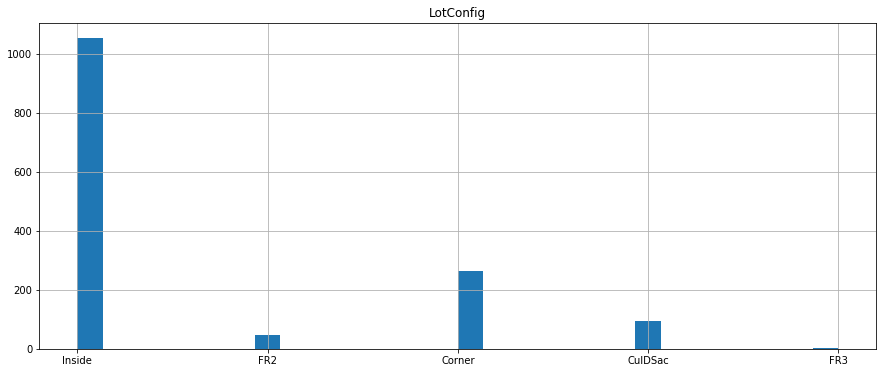

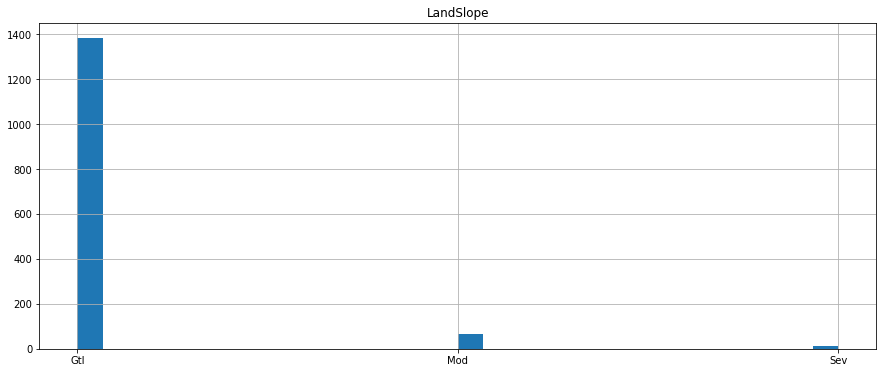

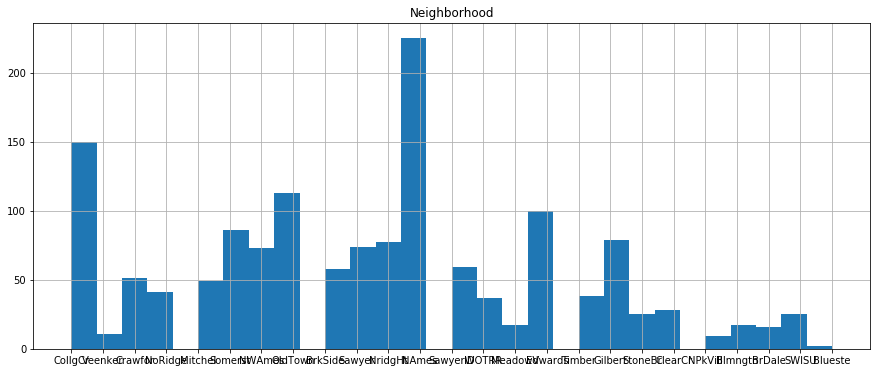

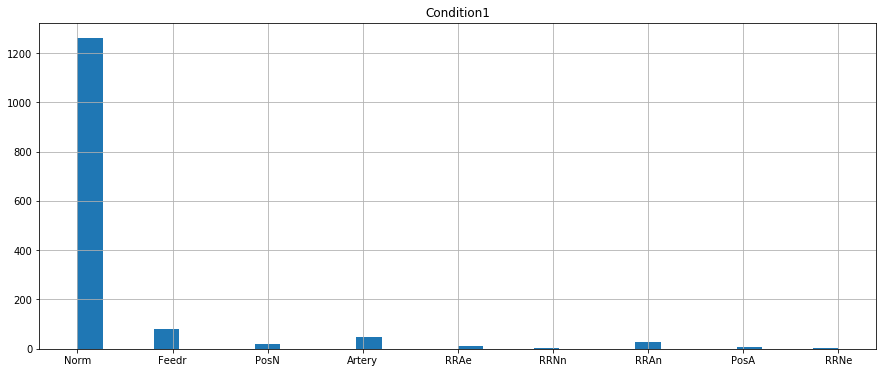

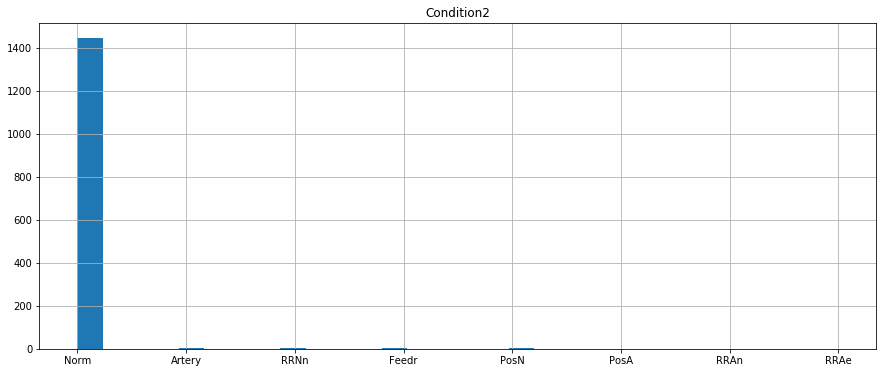

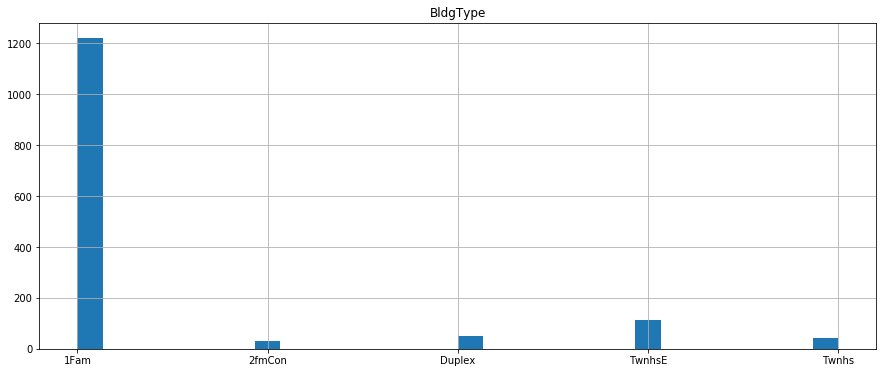

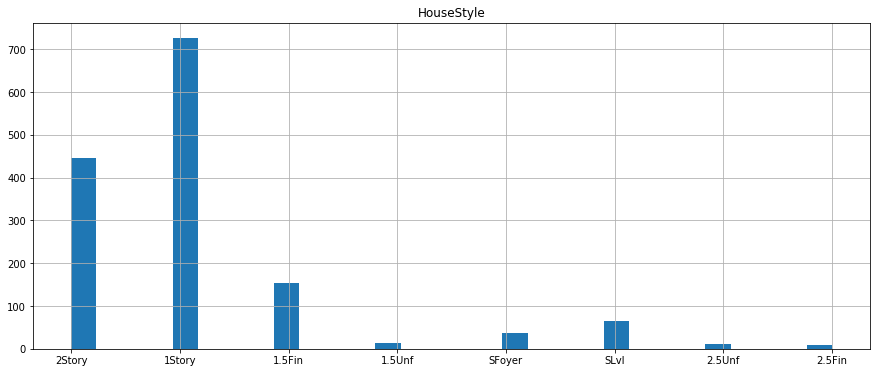

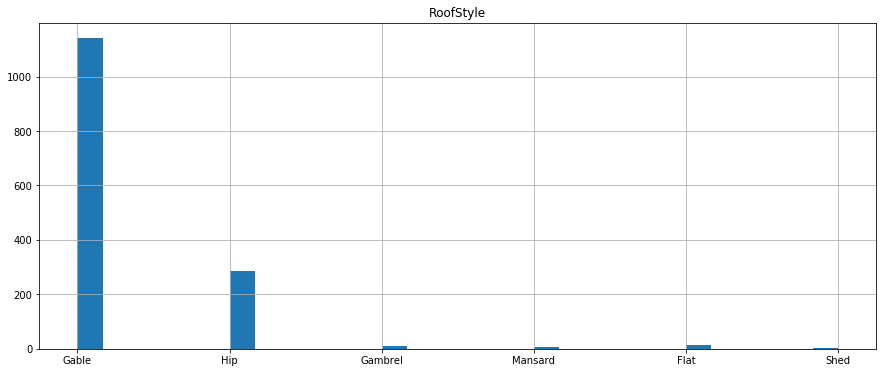

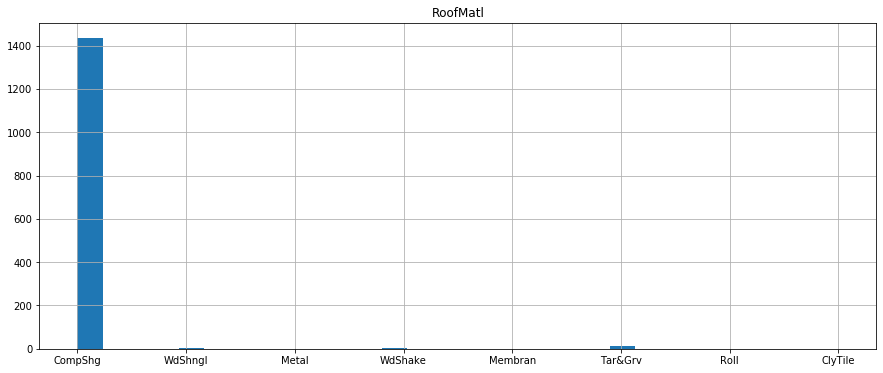

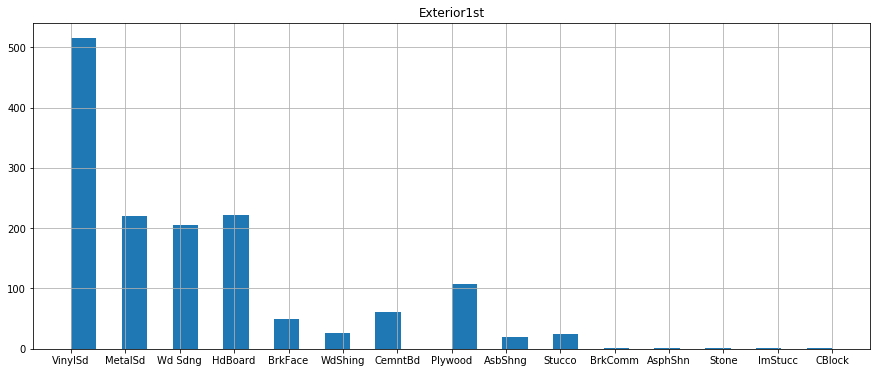

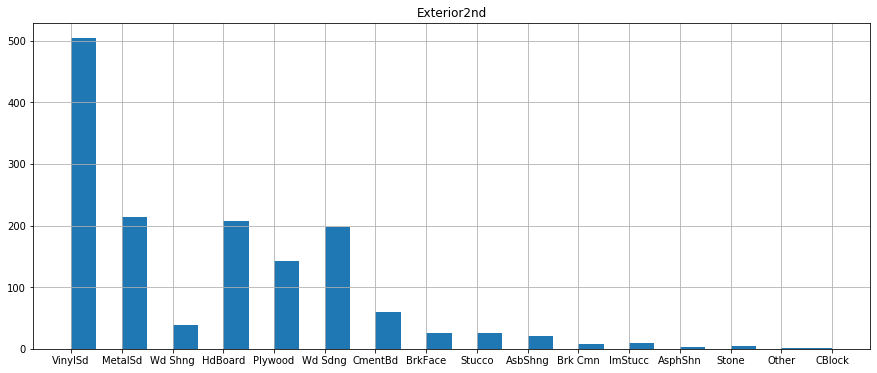

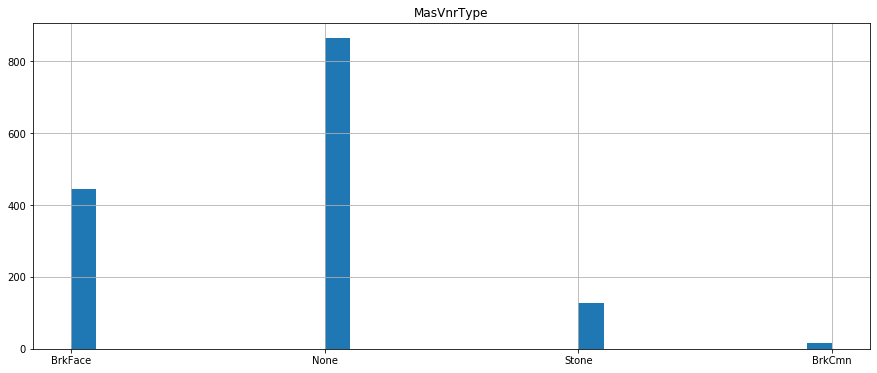

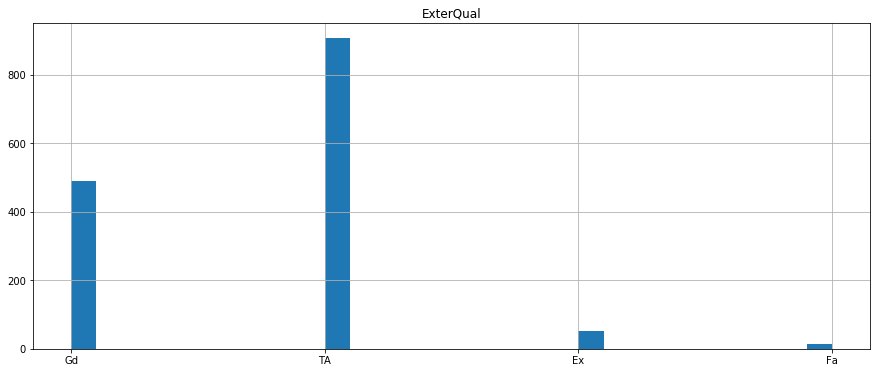

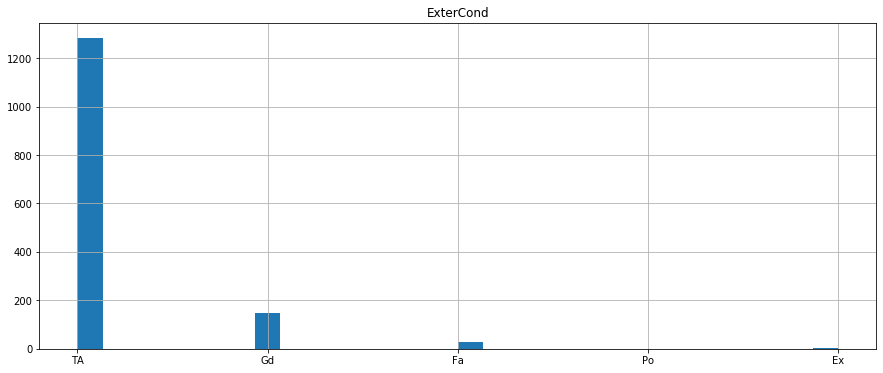

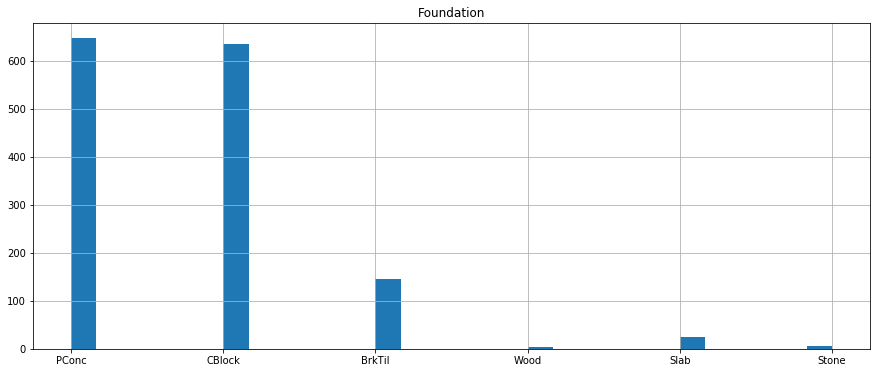

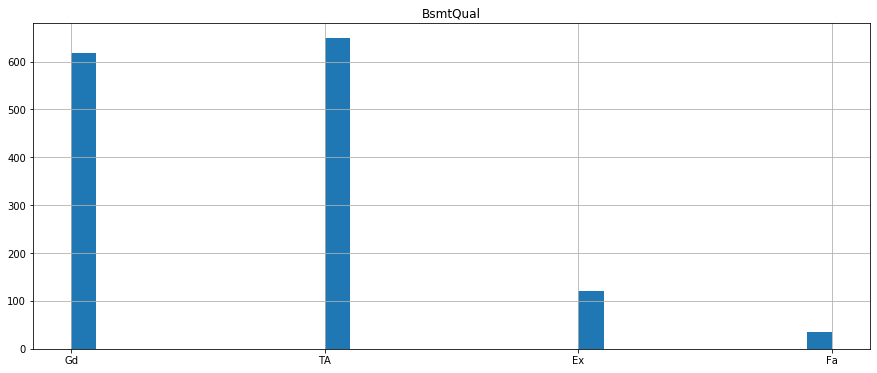

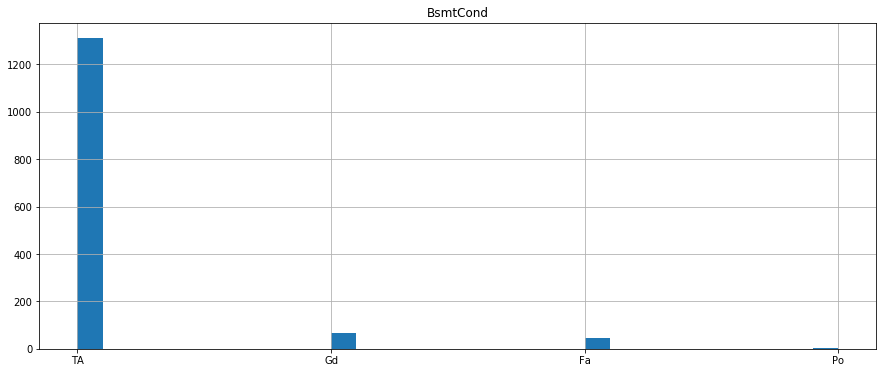

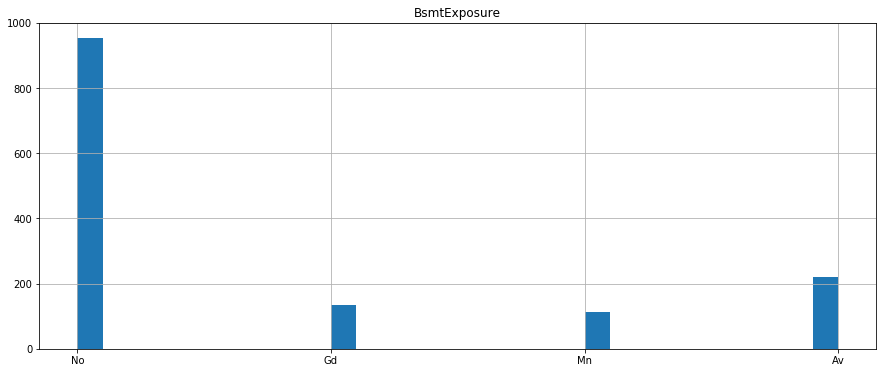

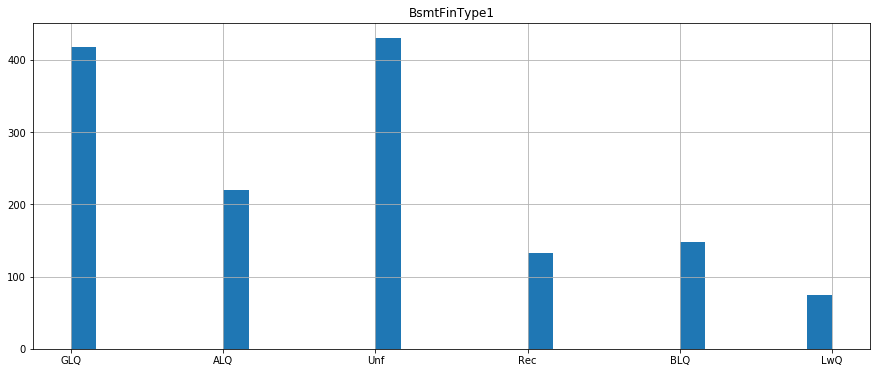

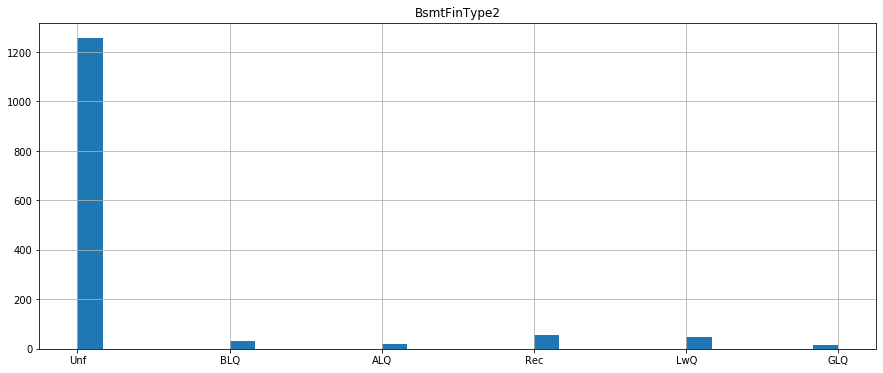

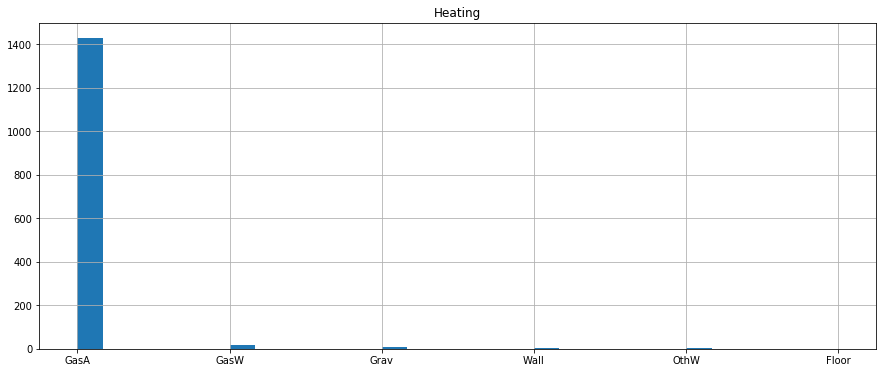

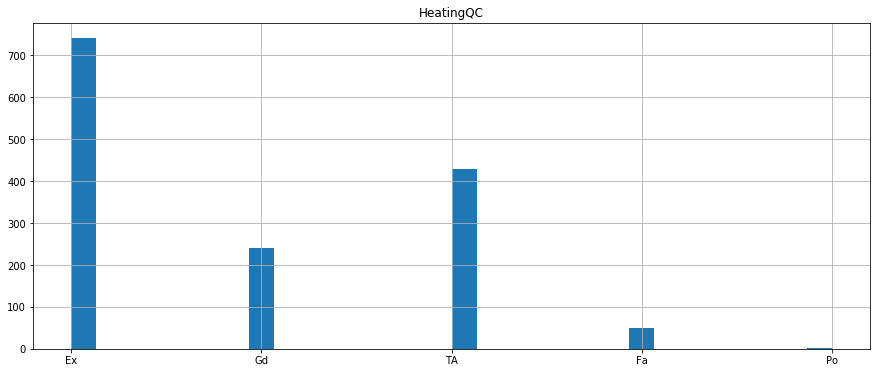

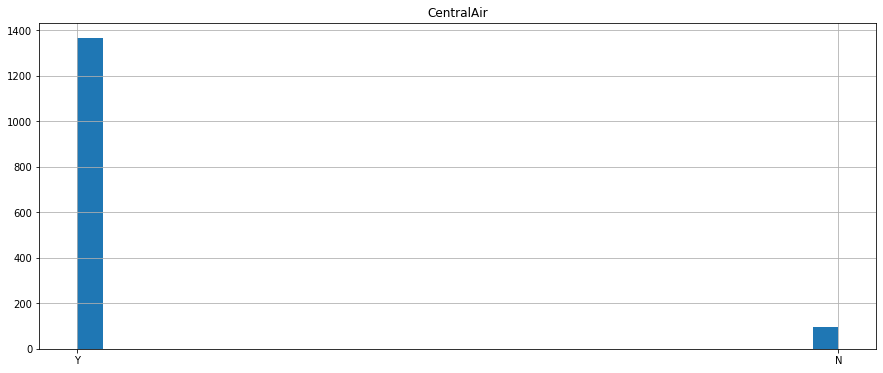

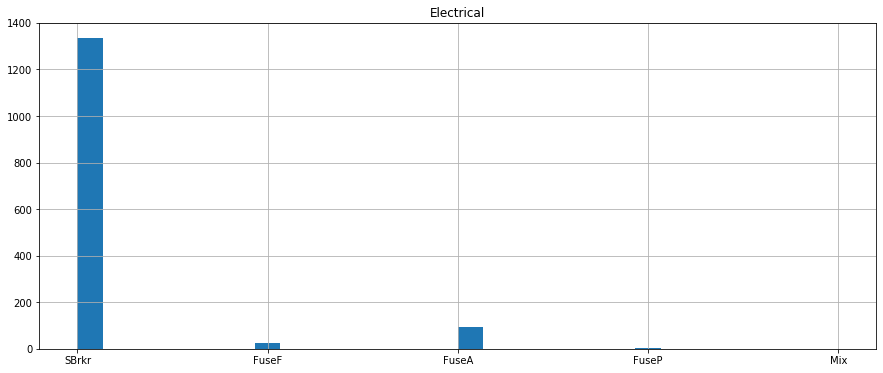

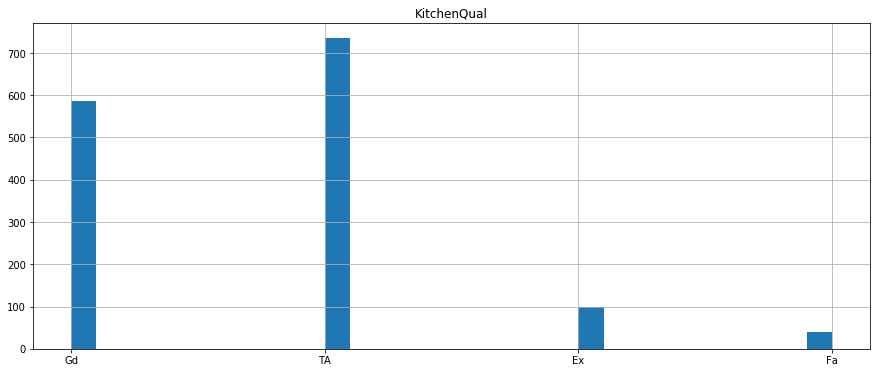

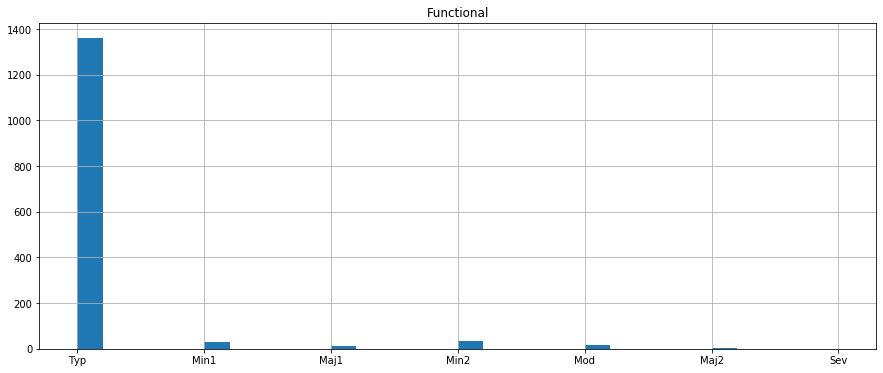

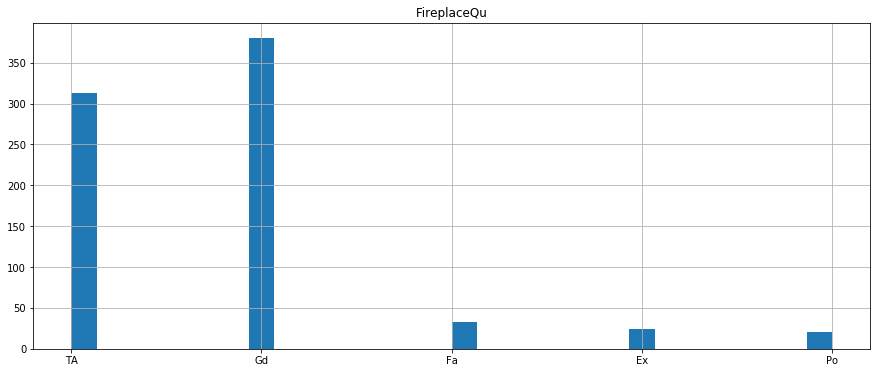

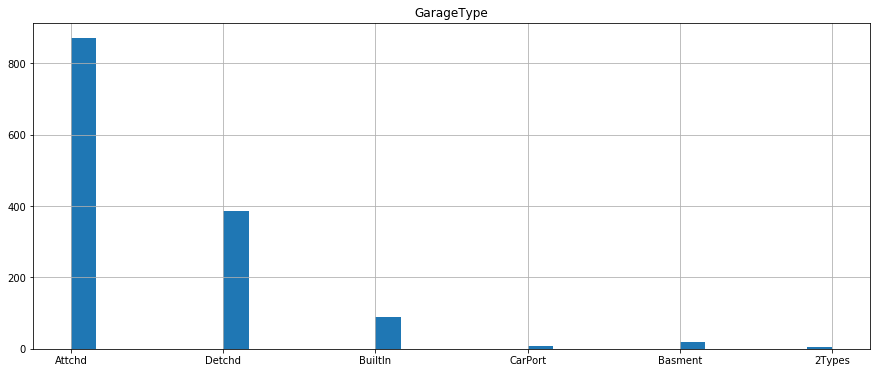

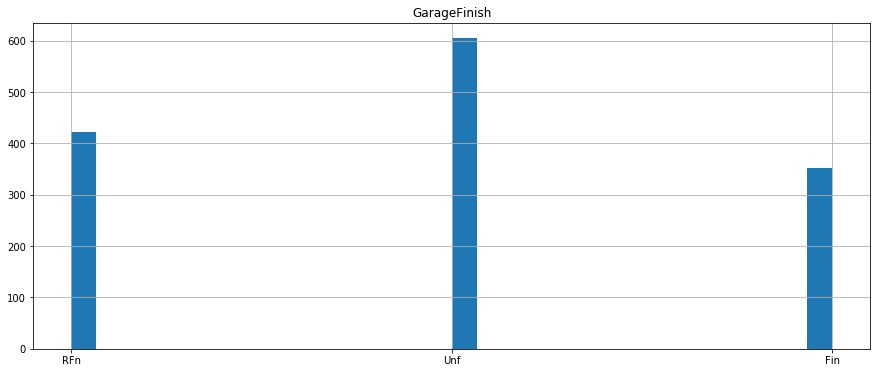

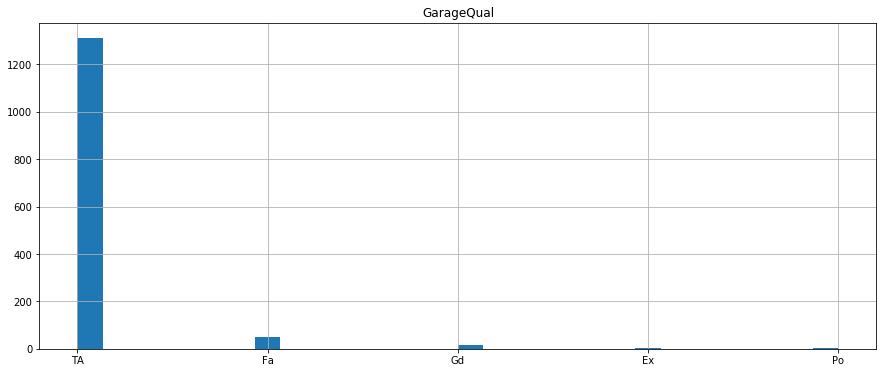

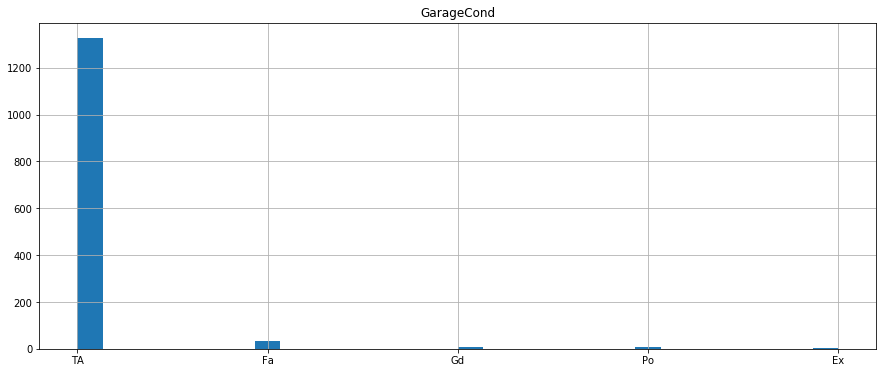

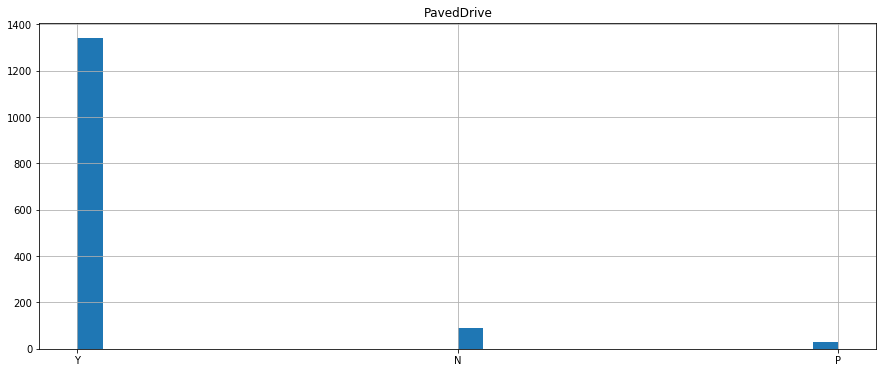

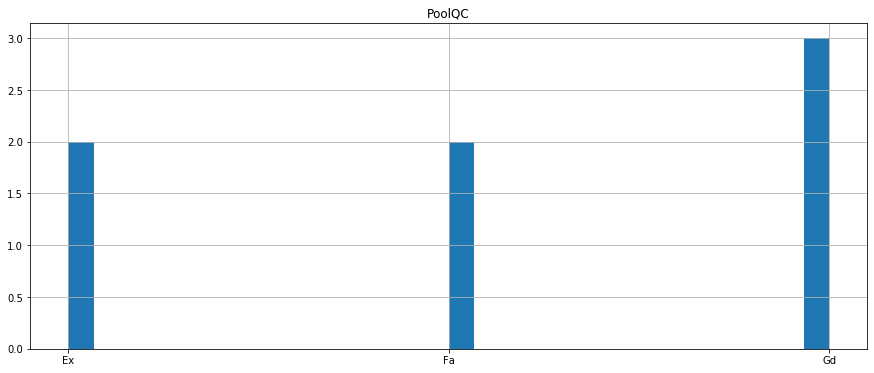

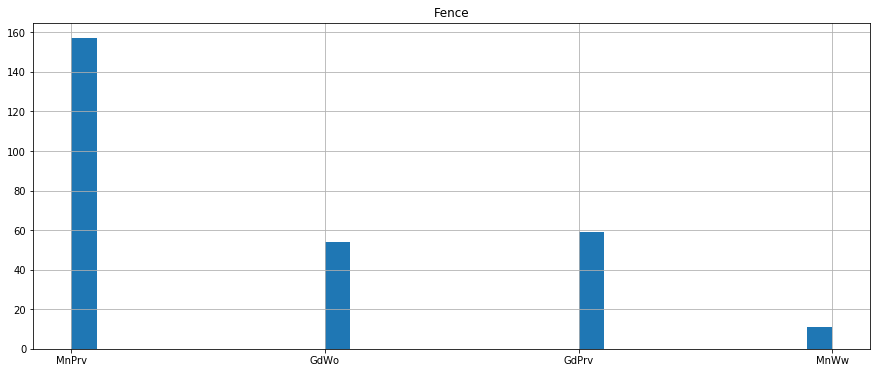

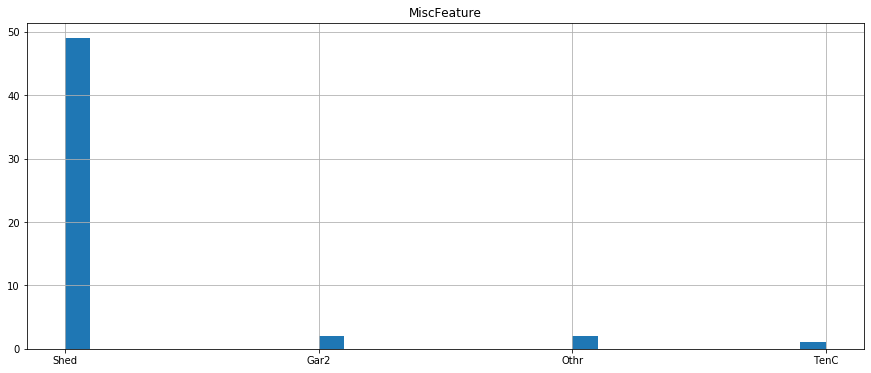

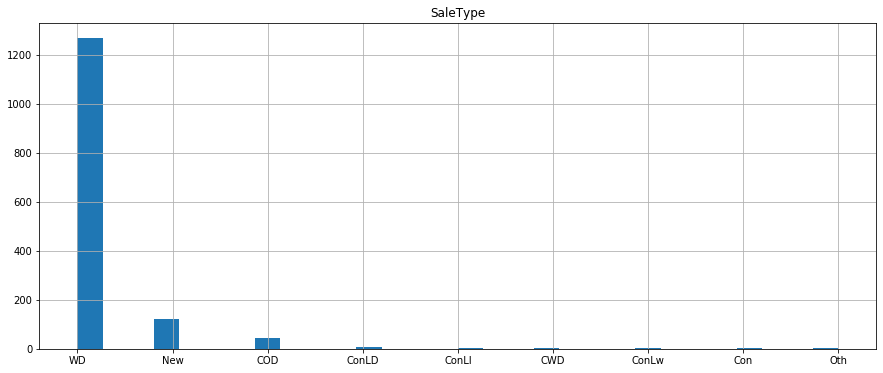

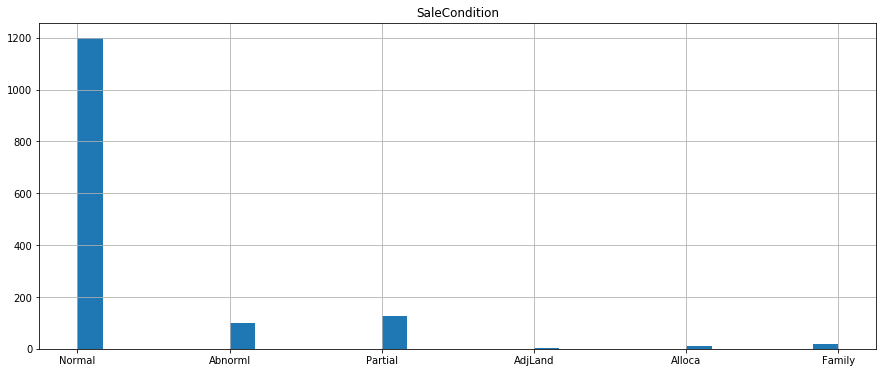

In [19]:
#how categorical features are distrubuted
for feature in categorical_features:
    data=df.copy()
    plt.figure(figsize=(15,6))
    data[feature].hist(bins=30)
    plt.title(feature)
    plt.show()
    

In [20]:
#Numerical features distribution

In [21]:
#continuous variables


In [22]:
df[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
#year data
years_data=[feature for feature in df.columns if 'Yr' in feature or 'Year' in feature  ]
years_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
df[years_data]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [25]:
#how years data related to saleprice

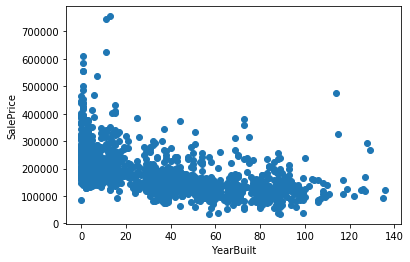

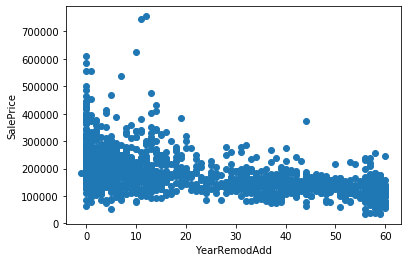

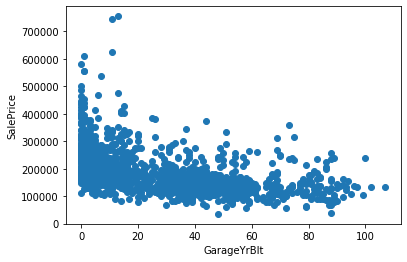

In [26]:
for feature in years_data:
    if feature !='YrSold':
        df[feature]=df['YrSold']-df[feature]
        plt.scatter(df[feature],df.SalePrice)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [27]:
for feature in numerical_features:
     print(feature,df[feature].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
YearBuilt [  5  31   7  91   8  16   3  36  77  69  43   1  46  48  78  40  39   4
  51   6  42   2  59  49  81  88  15  55  57  53  41  24  33  47  89  10
  72  25  52  44   0  87  12  65  34  11  56  95  60  99  14  94  13 

In [28]:
#discrete features
discrete_features=[feature for feature in df.columns if (len(df[feature].unique())<25) and (df[feature].dtype!='object')]

In [29]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


In [30]:
#continous features
continuous_features=[feature for feature in df.columns if feature not in discrete_features and feature not in years_data and (df[feature].dtype!='object')]

In [31]:
df[continuous_features]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


In [32]:
#check the distribution of continuous features

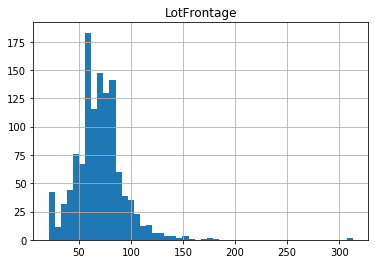

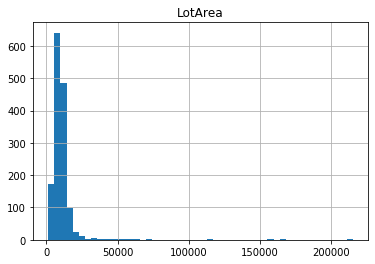

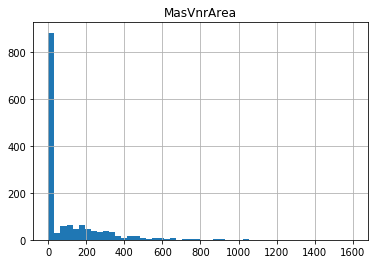

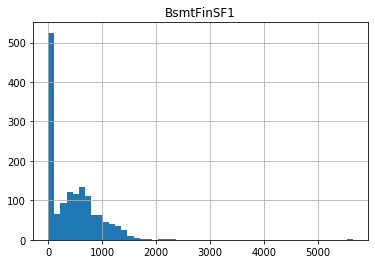

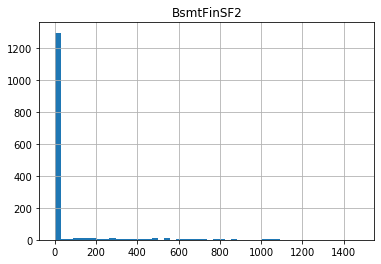

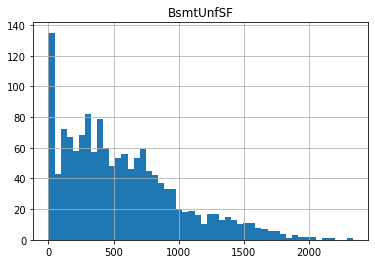

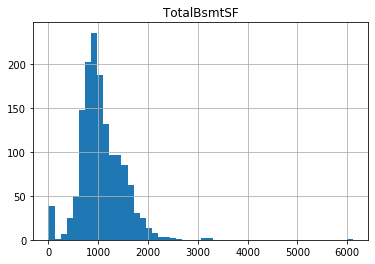

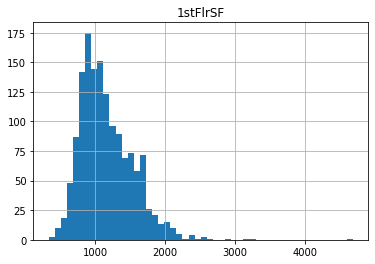

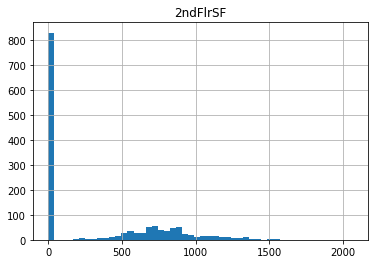

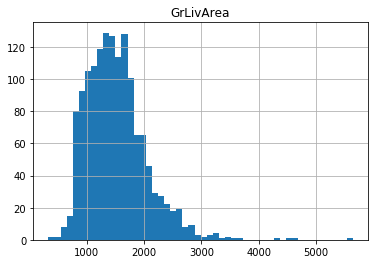

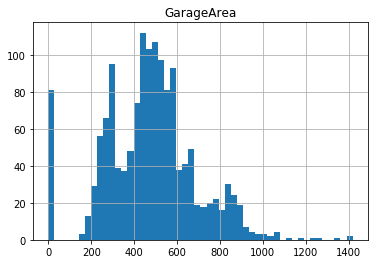

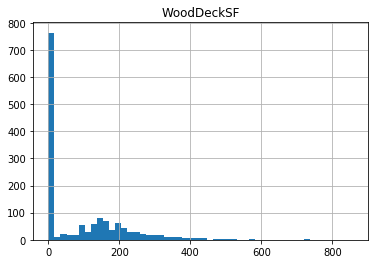

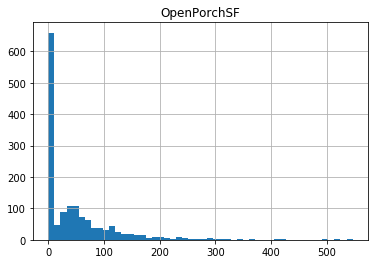

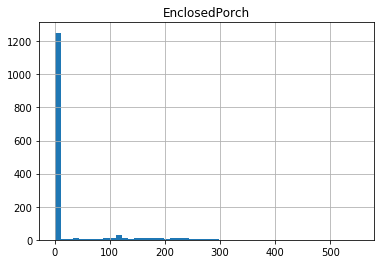

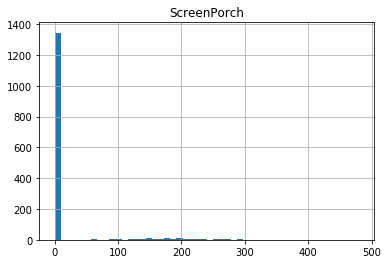

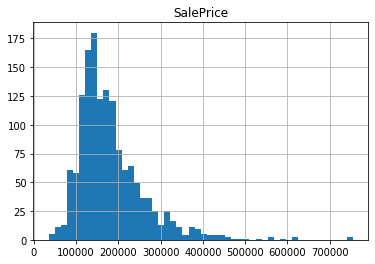

In [33]:
for feature in continuous_features:
    df[feature].hist(bins=50)
    plt.title(feature)
    plt.show()

In [34]:
data=df[numerical_features]
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,5,5,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,31,31,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,7,6,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,91,36,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,8,8,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
#check wheather feature is gaussion or normal distributed 

In [36]:
import scipy.stats as stat
import pylab

C:\Users\JESAL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\JESAL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\JESAL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



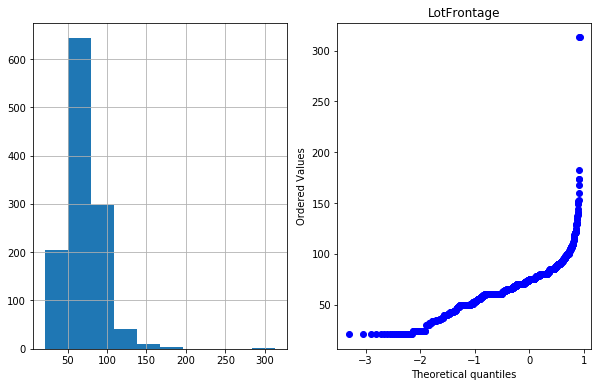

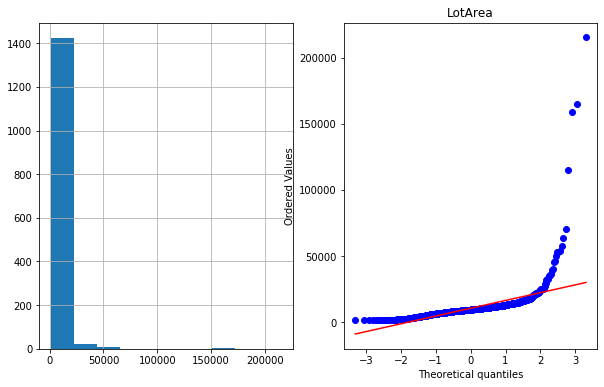

C:\Users\JESAL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\JESAL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\JESAL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



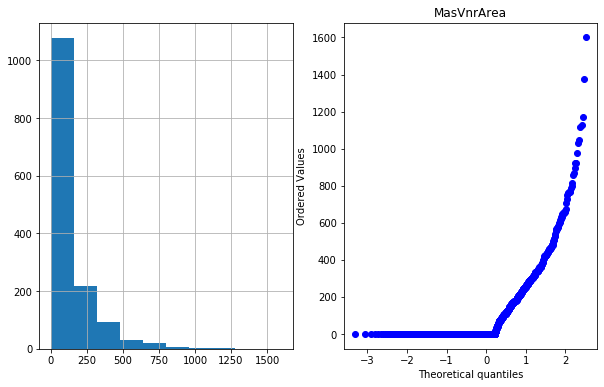

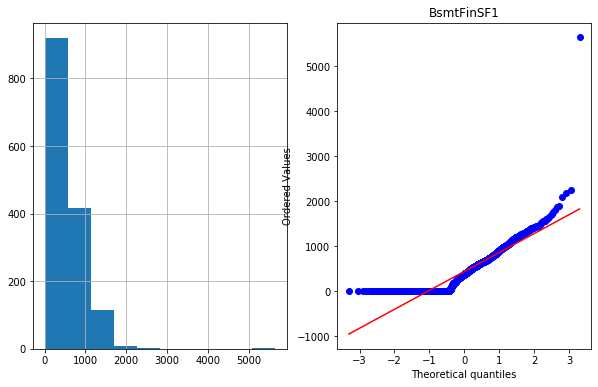

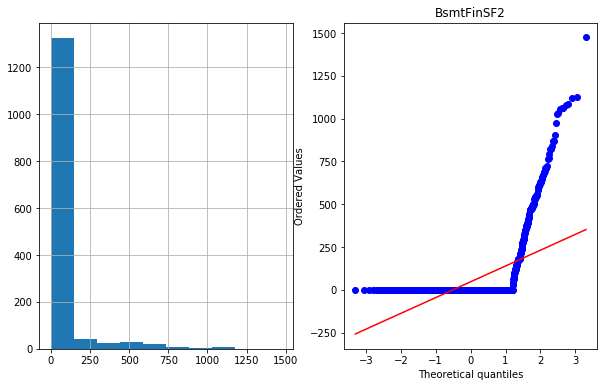

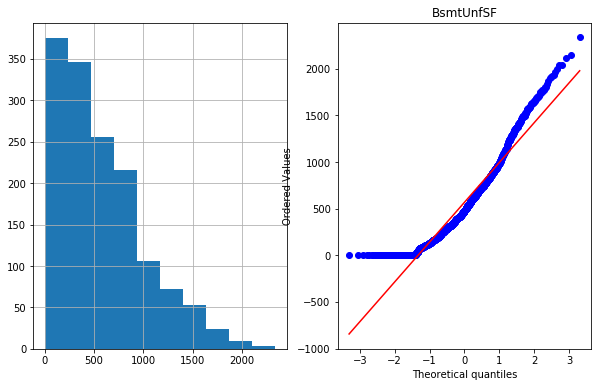

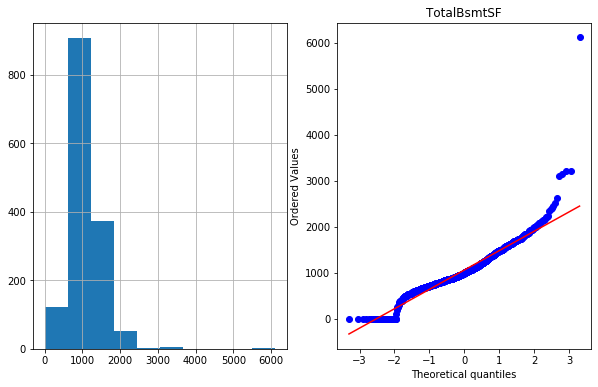

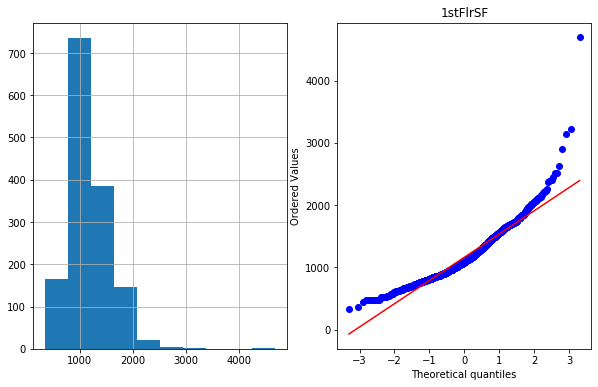

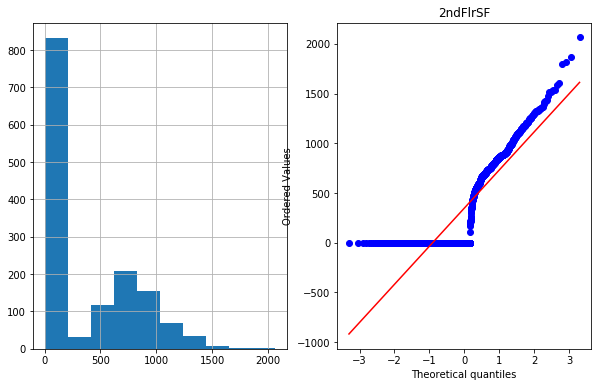

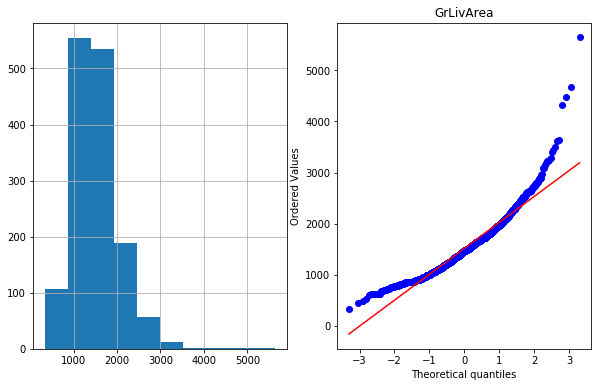

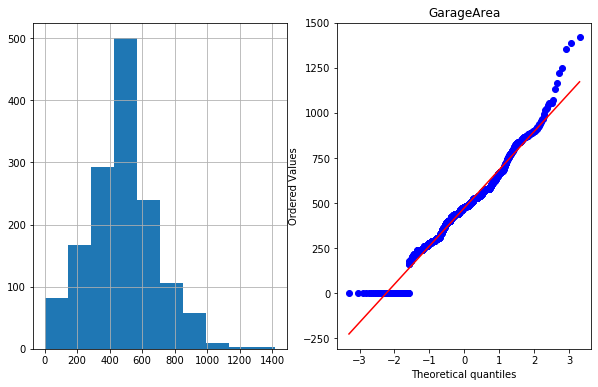

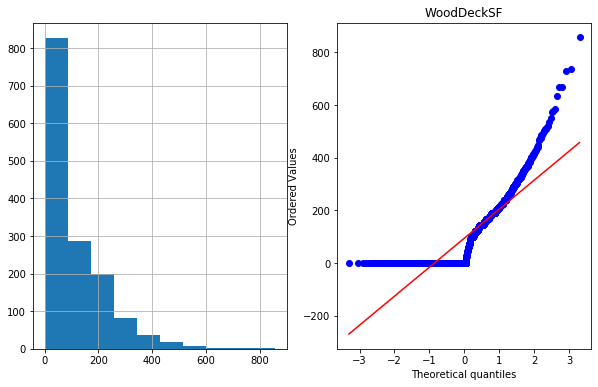

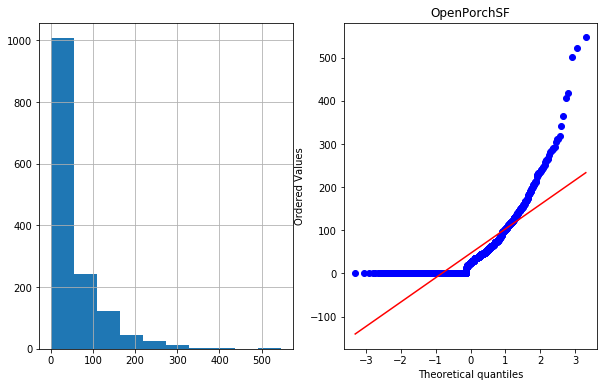

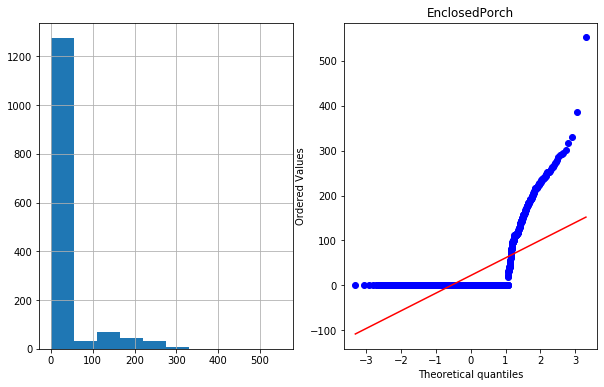

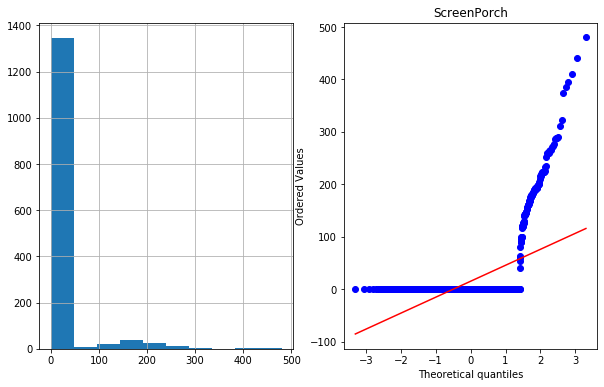

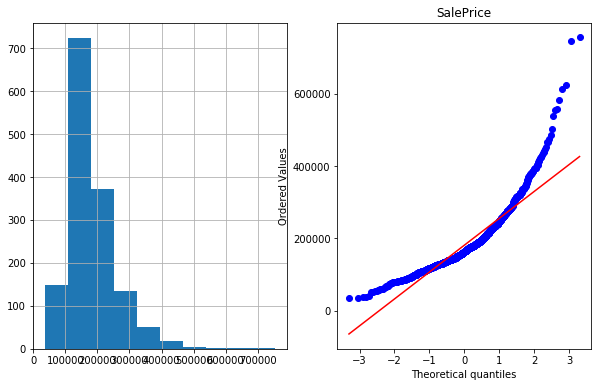

In [37]:
#### if you check wheather feature is gaussion or normal distributed 
#### Q-Q plot
for feature in continuous_features:
    
            plt.figure(figsize=(10,6))
            plt.subplot(1,2,1)
            df[feature].hist()
            plt.subplot(1,2,2)
            stat.probplot(df[feature],dist='norm',plot=pylab)
            plt.title(feature)
            plt.show()


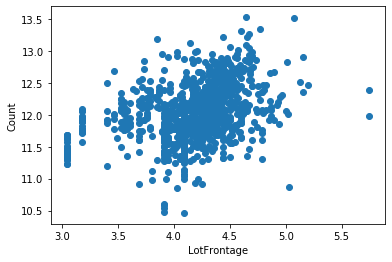

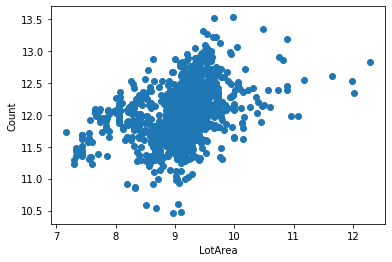

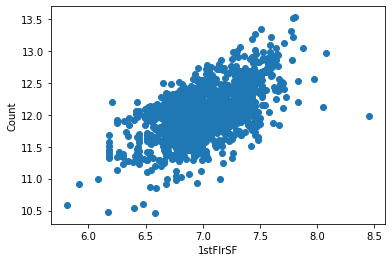

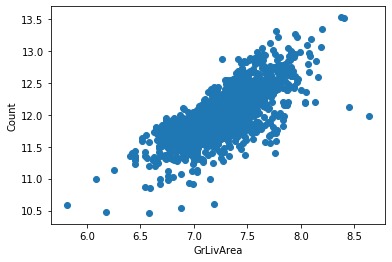

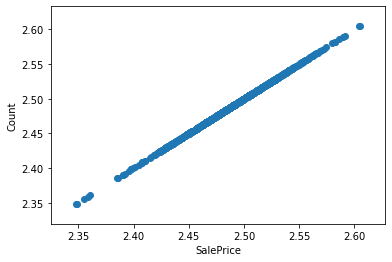

In [38]:
#how cotinuous features effect to saleprice
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

        

In [39]:
#classification of each categorical features

In [40]:
for feature in categorical_features:
    print(feature,':',len(df[feature].unique()),'subcategories')

MSZoning : 5 subcategories
Street : 2 subcategories
Alley : 3 subcategories
LotShape : 4 subcategories
LandContour : 4 subcategories
Utilities : 2 subcategories
LotConfig : 5 subcategories
LandSlope : 3 subcategories
Neighborhood : 25 subcategories
Condition1 : 9 subcategories
Condition2 : 8 subcategories
BldgType : 5 subcategories
HouseStyle : 8 subcategories
RoofStyle : 6 subcategories
RoofMatl : 8 subcategories
Exterior1st : 15 subcategories
Exterior2nd : 16 subcategories
MasVnrType : 5 subcategories
ExterQual : 4 subcategories
ExterCond : 5 subcategories
Foundation : 6 subcategories
BsmtQual : 5 subcategories
BsmtCond : 5 subcategories
BsmtExposure : 5 subcategories
BsmtFinType1 : 7 subcategories
BsmtFinType2 : 7 subcategories
Heating : 6 subcategories
HeatingQC : 5 subcategories
CentralAir : 2 subcategories
Electrical : 6 subcategories
KitchenQual : 4 subcategories
Functional : 7 subcategories
FireplaceQu : 6 subcategories
GarageType : 7 subcategories
GarageFinish : 4 subcategorie

In [41]:
#Outliears

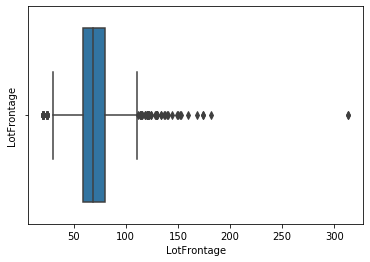

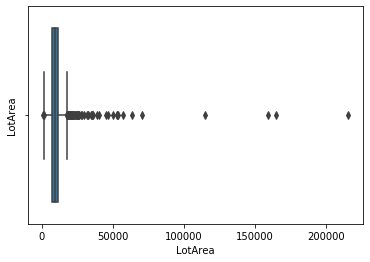

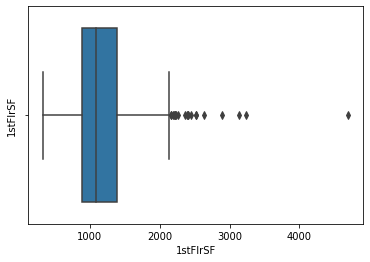

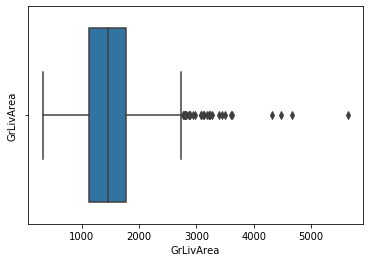

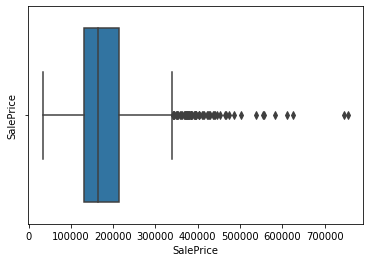

In [42]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
       
        sb.boxplot(df[feature])
        plt.ylabel(feature)
        
        plt.show()


In [43]:
df[categorical_features].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# correlation of each variable with salesPrice

In [44]:
corr=data[df.columns[:]].corr()['SalePrice'][:]
corr



MSSubClass      -0.073959
LotFrontage      0.355878
LotArea          0.257320
OverallQual      0.817184
OverallCond     -0.036868
YearBuilt       -0.587290
YearRemodAdd    -0.568136
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209044
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
GarageYrBlt     -0.542110
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057329
YrSold          -0.037263
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [45]:
corr.iplot(kind='bar',theme='henanigans')


###  highly correlated to SalesPrice:
-  OverallQual 
- YearBuild
- YearRemodeAdd
- GarageYrBlt
- GrLivArea

### Less Correlates to SalePrice
- MSSubClass
- OverallCond 
- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath 
- MiscVal  
- MoSold     
- YrSold 
- 3SsnPorch 
- PoolArea  
- ScreenPorch


In [46]:
months={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'Sept',10:'Octo',11:'Nov',12:'Dec'}
df1=pd.DataFrame(df.MoSold)


In [47]:
df1['MoSold_Name']=df1['MoSold'].map(months)
df1.sort_values(by='MoSold',ascending=True,inplace=True)

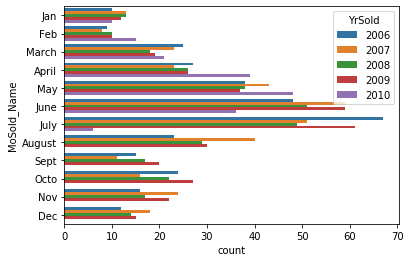

In [48]:
sb.countplot(y=df1['MoSold_Name'],hue=df['YrSold'])

### From above graph
- High selling of house -->june,july
-  july-2006 -->Highest selling 
- Year 2010 after August there sellling rate almost NILL
- year 2006 ,2007,2009:overall sales is good. 

# Feature Engineering

- handling missing values
- drop less correlated feature
- Handle Categorical Feature -Labels

In [49]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [50]:
#We can drop PoolQC, MiscFeature, Alley and Fence features because they have more than 80% of missing values.

In [51]:
#Drop PoolQC, MiscFeature, Alley and Fence features
df= df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [52]:
#Handle Missing values

In [53]:
print('No of missing valued Features:',len(missing_val))

No of missing valued Features: 18


## handle Categorical missing valued Feature


In [54]:
categorical_missing=[feature for feature in df.columns if df[feature].isnull().sum()>=1 and  df[feature].dtype=='object']
categorical_missing

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

###   Frequent Categories Imputation




In [55]:
df[categorical_missing].isnull().mean().sort_values()

Electrical      0.000685
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
FireplaceQu     0.472603
dtype: float64

In [56]:
#use countplot to check the frequant category

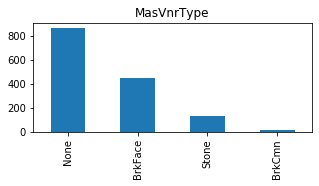

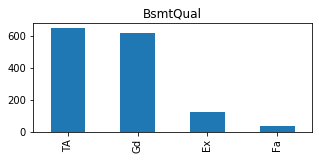

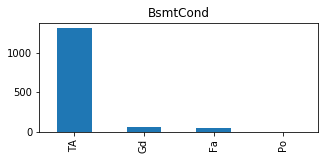

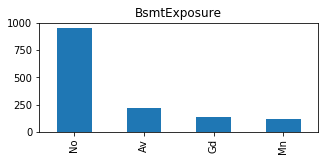

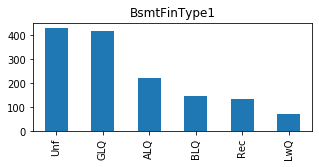

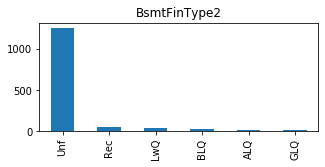

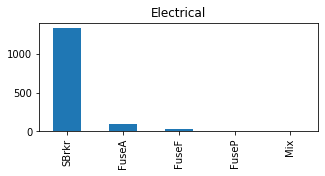

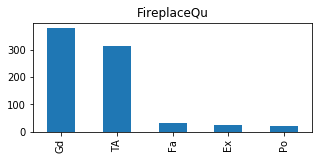

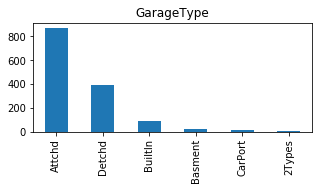

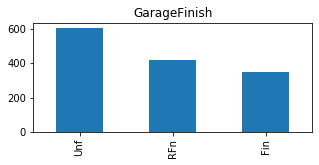

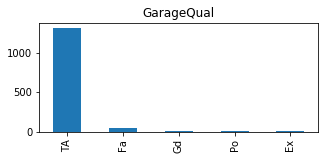

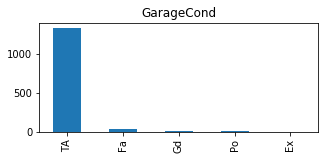

In [57]:
for feature in df[categorical_missing]:
    data=df.copy()
    plt.figure(figsize=(5,2))
    data[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()
    

### replace missing data with most frequant category

In [58]:
def impute(data,variable):
         s=data[variable].value_counts().index[0]
         data[variable].fillna(s,inplace=True)

In [59]:
for feature in categorical_missing:
    impute(df,feature)

## Handle Numerical missing valued Feature

In [60]:
numerical_missing=[feature for feature in df.columns if df[feature].isnull().sum()>=1 and  df[feature].dtype!='object']
numerical_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [61]:
df[numerical_missing].isnull().mean().sort_values()

MasVnrArea     0.005479
GarageYrBlt    0.055479
LotFrontage    0.177397
dtype: float64

In [62]:
numerical_missing=df[numerical_missing]

## Imputation for Numerical missing values using k-Nearest Neighbors Imputer.
- Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.


In [63]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_missing=imputer.fit_transform(numerical_missing)
numerical_missing=pd.DataFrame(numerical_missing)
numerical_missing.rename(columns={0: "LotFrontage", 1: "MasVnrArea",2:'GarageYrBlt'},inplace=True)
numerical_missing

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,5.0
1,80.0,0.0,31.0
2,68.0,162.0,7.0
3,60.0,0.0,8.0
4,84.0,350.0,8.0
...,...,...,...
1455,62.0,0.0,8.0
1456,85.0,119.0,32.0
1457,66.0,0.0,69.0
1458,68.0,0.0,60.0


In [64]:
numerical_missing.isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [65]:
df.drop('LotFrontage',axis=1,inplace=True)

In [66]:
df.drop('MasVnrArea',axis=1,inplace=True)

In [67]:
df.drop('GarageYrBlt',axis=1,inplace=True)

In [68]:
data=pd.concat([df,numerical_missing],axis=1)

In [69]:
data[numerical_features].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## temporal variables(Date time variable)

In [70]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[feature]=data['YrSold']-data[feature]

In [71]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0


In [72]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,208500,65.0,196.0,2003.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,2007,WD,Normal,181500,80.0,0.0,1976.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,223500,68.0,162.0,2001.0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,140000,60.0,0.0,1998.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,250000,84.0,350.0,2000.0


In [73]:
data['TotalBsmtBath'] = data['BsmtFullBath'] + data['BsmtFullBath']*0.5
data['TotalBath'] = data['FullBath'] + data['HalfBath']*0.5 
data['TotalSA']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [74]:
data.drop(['BsmtFullBath','BsmtFullBath','FullBath','HalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

## After making some plots we found that we have some colums with low variance so we decide to delete them

In [75]:
cat_var=[feature for feature in data.columns if data[feature].dtype=='object']

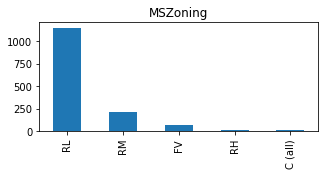

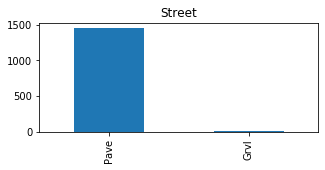

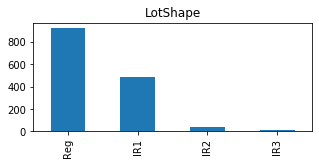

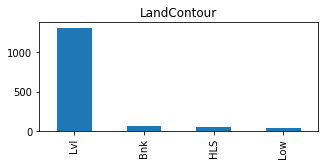

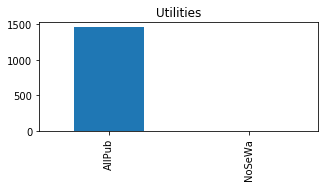

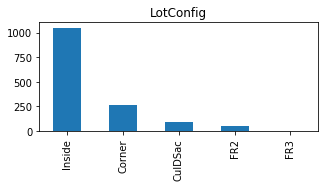

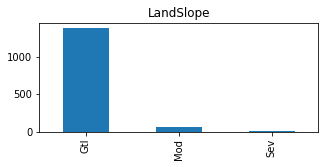

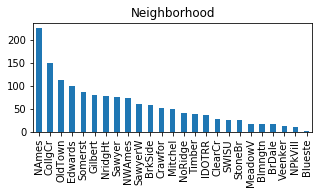

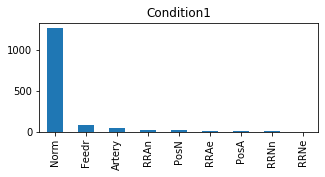

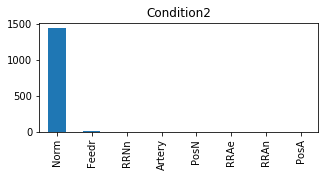

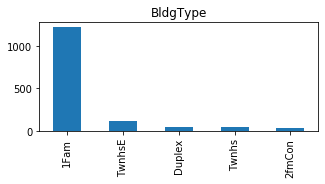

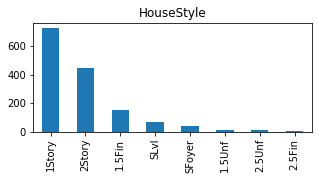

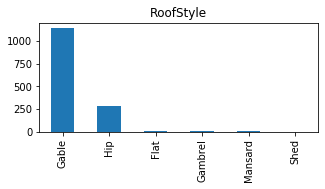

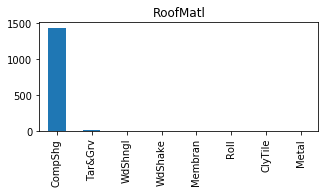

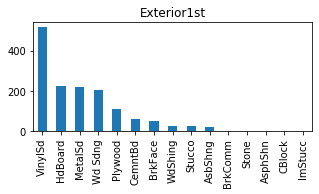

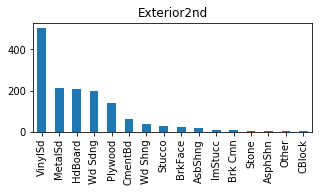

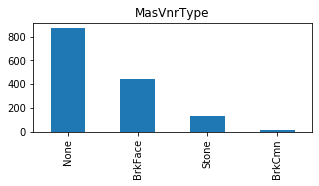

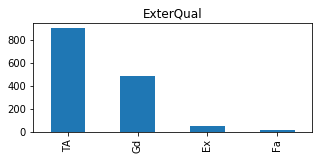

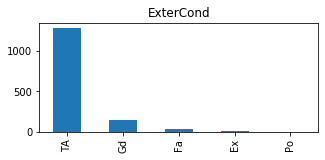

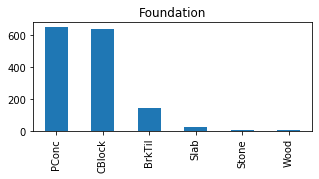

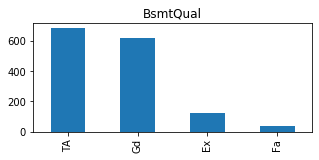

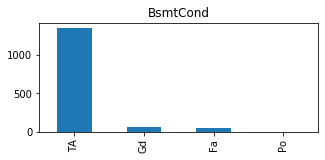

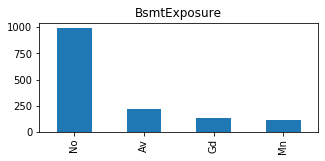

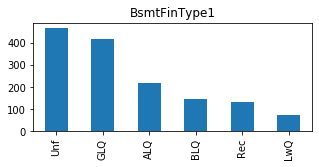

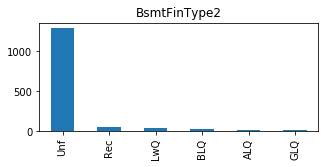

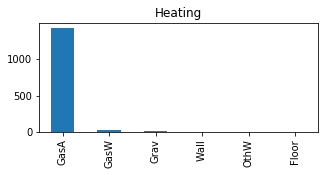

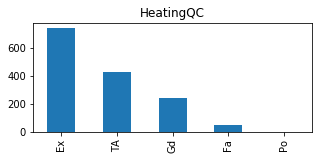

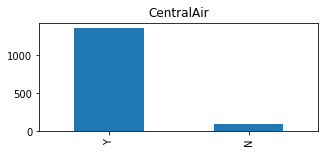

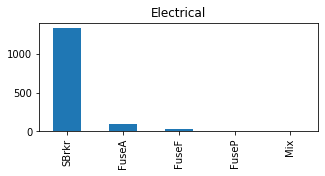

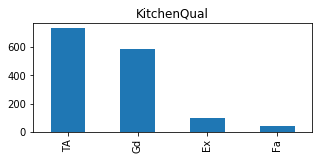

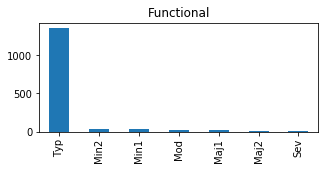

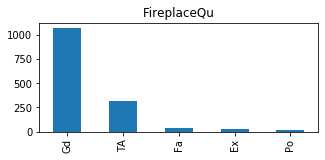

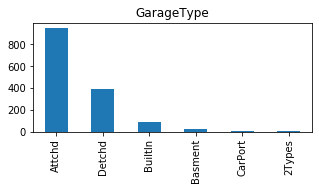

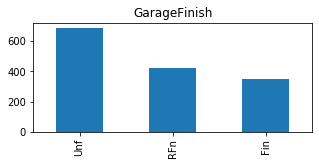

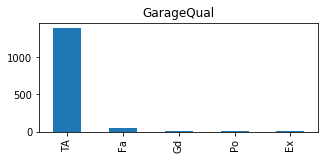

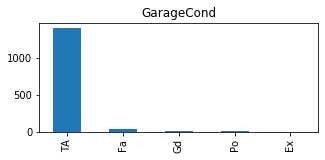

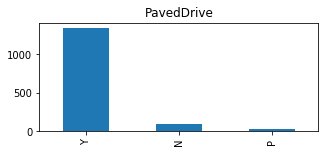

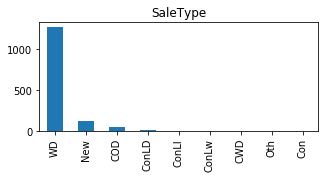

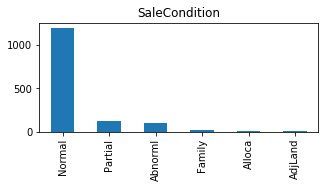

In [76]:
for feature in data[cat_var]:
    dataset=df.copy()
    plt.figure(figsize=(5,2))
    dataset[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()
    

In [77]:
data.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1,inplace=True)

In [78]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'LotFrontage', 'MasVnrArea',
       'Garage

In [79]:
import numpy as np
num_feature=['LotFrontage','LotArea','GrLivArea']

for feature in num_feature:
    data[feature]=np.log(data[feature])

##  Handling  Outlier

In [80]:
continuous_features=[feature for feature in data.columns if feature not in discrete_features and feature not in years_data and (data[feature].dtype!='object')]

In [81]:
data[continuous_features].iplot(kind='box')

In [82]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[continuous_features]))
print(z)

[[1.33231018e-01 5.75424837e-01 2.88652831e-01 ... 1.10781015e+00
  1.16938668e+00 1.27658638e-03]
 [1.13441808e-01 1.17199212e+00 2.88652831e-01 ... 8.19964365e-01
  3.82972793e-01 5.24067478e-02]
 [4.20060741e-01 9.29071821e-02 2.88652831e-01 ... 1.10781015e+00
  1.16938668e+00 1.69157285e-01]
 ...
 [2.32483949e-03 3.69871114e-01 2.88652831e-01 ... 8.19964365e-01
  3.82972793e-01 1.12602173e+00]
 [1.36860546e-01 8.65548341e-01 6.09218785e+00 ... 1.10781015e+00
  1.18985499e+00 5.00404352e-01]
 [1.80142004e-01 8.47389333e-01 1.50964046e+00 ... 1.10781015e+00
  4.03441099e-01 6.70153653e-02]]


In [83]:
threshold = 3
print(np.where(z > 3))

(array([   3,    7,   24,   28,   29,   37,   46,   52,   53,   53,   53,
         56,   58,   58,   64,   70,   70,   72,   75,   75,   80,  104,
        105,  113,  115,  116,  137,  145,  153,  154,  161,  166,  166,
        169,  169,  176,  178,  178,  178,  178,  185,  185,  185,  188,
        189,  193,  195,  196,  197,  224,  224,  225,  225,  227,  227,
        232,  232,  233,  235,  235,  249,  253,  260,  260,  263,  271,
        273,  278,  289,  293,  297,  297,  306,  312,  313,  313,  313,
        314,  322,  325,  326,  328,  335,  335,  335,  339,  343,  349,
        349,  351,  355,  357,  358,  359,  360,  363,  363,  365,  366,
        380,  384,  389,  400,  403,  414,  420,  426,  430,  430,  432,
        434,  434,  440,  440,  440,  446,  451,  454,  457,  459,  462,
        470,  471,  473,  475,  477,  477,  480,  489,  489,  493,  495,
        496,  496,  496,  496,  499,  500,  500,  504,  517,  520,  523,
        523,  523,  523,  523,  527,  533,  542,  

In [84]:
data = data[(z < 3).all(axis=1)]

In [88]:
data[continuous_features].iplot(kind='box')

#  Feature Scalling

In [89]:
num_vars=[feature  for feature in data.columns if data[feature].dtype!='object']

In [90]:
feature_scale=[feature for feature in data[num_vars] if feature not in['Id','SalePrice']]


In [91]:
feature_scale

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'TotalBsmtBath',
 'TotalBath',
 'TotalSA']

In [92]:
data[feature_scale]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,TotalBsmtBath,TotalBath,TotalSA
0,60,9.041922,7,5,2003,2003,706,0,150,0,...,0,0,2,2008,4.174387,196.0,2003.0,1.5,2.5,2566
1,20,9.169518,6,8,1976,1976,978,0,284,0,...,0,0,5,2007,4.382027,0.0,1976.0,0.0,2.0,2524
2,60,9.328123,7,5,2001,2002,486,0,434,0,...,0,0,9,2008,4.219508,162.0,2001.0,1.5,2.5,2706
4,60,9.565214,8,5,2000,2000,655,0,490,0,...,0,0,12,2008,4.430817,350.0,2000.0,1.5,2.5,3343
5,50,9.554993,5,5,1993,1995,732,0,64,0,...,0,700,10,2009,4.442651,0.0,1993.0,1.5,1.5,2158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,20,9.753653,5,5,2006,2006,0,0,1140,0,...,0,0,7,2006,4.499810,0.0,1975.4,0.0,1.0,2280
1454,20,8.922658,7,5,2004,2005,410,0,811,0,...,0,0,10,2009,4.127134,0.0,2004.0,1.5,2.0,2442
1455,60,8.976768,6,5,1999,2000,0,0,953,0,...,0,0,8,2007,4.127134,0.0,1999.0,0.0,2.5,2600
1456,20,9.486076,6,6,1978,1988,790,163,589,0,...,0,0,2,2010,4.442651,119.0,1978.0,1.5,2.0,3615


In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
scaler.fit(data[feature_scale])




StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='object']


In [95]:
for feature in categorical_features:
      print(feature,data[feature].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown' 'BrkSide'
 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 'Edwards'
 'Timber' 'Gilbert' 'ClearCr' 'Crawfor' 'NWAmes' 'NPkVill' 'StoneBr'
 'Blmngtn' 'SWISU']
Condition1 ['Norm' 'Feedr' 'Artery' 'RRAe' 'RRAn' 'PosA' 'PosN' 'RRNe' 'RRNn']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Exterior1st ['VinylSd' 'MetalSd' 'BrkFace' 'HdBoard' 'WdShing' 'Wd Sdng' 'CemntBd'
 'AsbShng' 'Stucco' 'Plywood' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'ImStucc' 'Asp

In [96]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }


In [97]:
data['LotShape']=data['LotShape'].map(bin_map)
data['ExterQual'] =data['ExterQual'].map(bin_map)
data['ExterCond']=data['ExterCond'].map(bin_map)
data['BsmtQual']=data['BsmtQual'].map(bin_map)
data['BsmtCond'] =data['BsmtCond'].map(bin_map)
data['BsmtExposure']=data['BsmtExposure'].map(bin_map)
data['HeatingQC']=data['HeatingQC'].map(bin_map)
data['CentralAir'] =data['CentralAir'].map(bin_map)
data['KitchenQual'] =data['KitchenQual'].map(bin_map)
data['FireplaceQu']=data['FireplaceQu'].map(bin_map)
data['GarageQual']=data['GarageQual'].map(bin_map)
data['GarageCond']=data['GarageCond'].map(bin_map)
data['BsmtFinType1']=data['BsmtFinType1'].map(bin_map)
data['BsmtFinType2'] =data['BsmtFinType2'].map(bin_map)


PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
data['PavedDrive'] = data['PavedDrive'].map(PavedDrive)


In [98]:
rc=data[categorical_features].drop(['BsmtFinType1','BsmtFinType2','GarageCond','GarageQual','FireplaceQu','KitchenQual','CentralAir','LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC'],axis=1)

In [99]:
object_columns_df = pd.get_dummies(rc, columns=rc.columns,drop_first=True) 
rc.columns

Index(['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [100]:
object_columns_df

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1454,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [101]:
data.drop(['MSZoning', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition'],axis=1,inplace=True)

In [102]:
fData=pd.concat([data,object_columns_df],axis=1)

# Feature Selection



In [103]:
fData.to_csv('FinalDF.csv',index=False)